In [20]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')

numpy: 2.3.2
pandas: 2.3.1
scipy: 1.16.1
scikit-learn: 1.7.1
seaborn: 0.13.2


In [21]:
os.chdir("../data")
print(os.getcwd())

/workspaces/4Geeks_final_project/data


In [22]:
df = pd.read_csv("training_data", encoding='latin1')

df.head()

,Unnamed: 0,Sales,Turnaround_Time,State_encoded,Postal_Code_encoded,Ship_Mode_first class,Ship_Mode_same day,Ship_Mode_second class,Ship_Mode_standard class,Category_furniture,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,0,261.9600,259200.0,15.0,215.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,731.9400,259200.0,15.0,215.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,14.6200,345600.0,3.0,512.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,957.5775,604800.0,8.0,168.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,22.3680,604800.0,8.0,168.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
tt = df.drop(["Unnamed: 0", "Sales"], axis = 1)

In [24]:
tt

,Turnaround_Time,State_encoded,Postal_Code_encoded,Ship_Mode_first class,Ship_Mode_same day,Ship_Mode_second class,Ship_Mode_standard class,Category_furniture,Category_office supplies,Category_technology,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,259200.0,15.0,215.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,259200.0,15.0,215.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,345600.0,3.0,512.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604800.0,8.0,168.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,604800.0,8.0,168.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,604800.0,11.0,343.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9553,432000.0,33.0,223.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9554,432000.0,33.0,223.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9555,432000.0,33.0,223.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
from sklearn.model_selection import train_test_split

X = tt.drop("Turnaround_Time", axis = 1)
y = tt["Turnaround_Time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

In [26]:
X

,State_encoded,Postal_Code_encoded,Ship_Mode_first class,Ship_Mode_same day,Ship_Mode_second class,Ship_Mode_standard class,Category_furniture,Category_office supplies,Category_technology,Sub_Category_accessories,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,15.0,215.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,215.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,512.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,168.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.0,168.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,11.0,343.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9553,33.0,223.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9554,33.0,223.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9555,33.0,223.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
y

0       259200.0
1       259200.0
2       345600.0
3       604800.0
4       604800.0
          ...   
9552    604800.0
9553    432000.0
9554    432000.0
9555    432000.0
9556    432000.0
Name: Turnaround_Time, Length: 9557, dtype: float64

In [28]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state = 42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [29]:
y_pred = model.predict(X_test)
y_pred

array([165496.39 , 217760.17 ,  56494.395, ..., 426391.06 , 250318.36 ,
       483929.56 ], shape=(1912,), dtype=float32)

In [30]:
from sklearn.metrics import mean_squared_error as mse , r2_score

print(f"Mean squared error: {mse(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 7571745114.978891
Coefficient of determination: 0.6800422342667147


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose =1, n_jobs= -1)

In [32]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits


Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 10, 'subsample': 1.0}


In [33]:
best_model = XGBRegressor(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 5 , n_estimators = 100, reg_alpha = 0, reg_lambda = 10, subsample = 1.0)

best_model.fit(X_train, y_train)
y_pred2 = best_model.predict(X_test)

print(f"Mean squared error: {mse(y_test, y_pred2)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred2)}")

Mean squared error: 7096575107.33287
Coefficient of determination: 0.7001214011801816


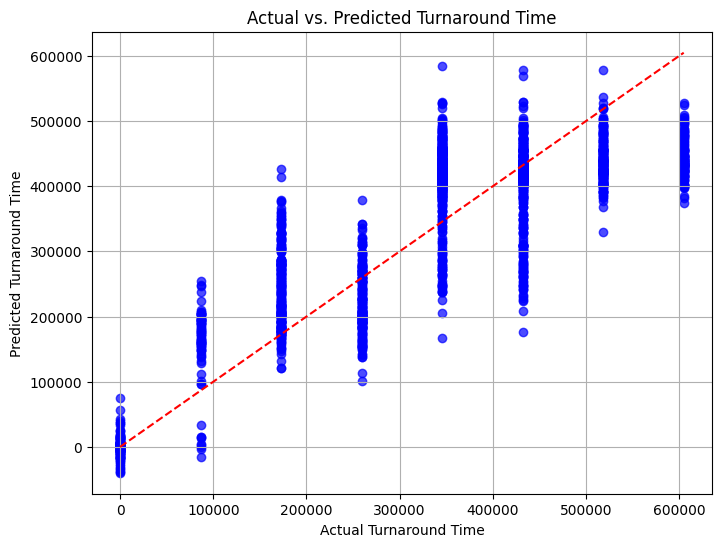

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual Turnaround Time")
plt.ylabel("Predicted Turnaround Time")
plt.title("Actual vs. Predicted Turnaround Time")
plt.grid(True)
plt.show()

In [35]:
residuals = y_test - y_pred

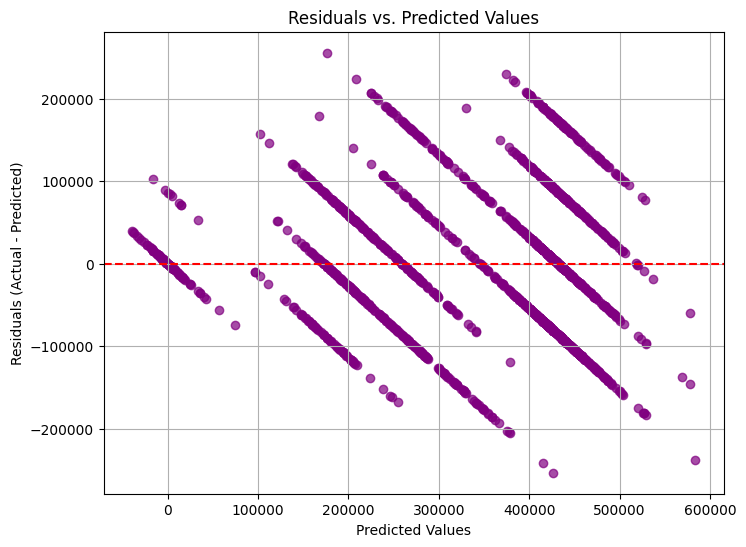

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()

In [37]:
os.chdir("../models")
print(os.getcwd())

/workspaces/4Geeks_final_project/models


In [38]:
import pickle

with open("turnaroundtime_predictor.pkl", "wb") as f:
    pickle.dump(best_model, f)